In [10]:
#importamos librerias 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [11]:
#cargar archivo csv
df=pd.read_csv('Malta_limpio.csv')
#eliminamos la columna unnamed 
df= df.drop(['Unnamed: 0'], axis=1)
df.head(5)

listing_url  \
0   https://www.airbnb.com/rooms/50188   
1   https://www.airbnb.com/rooms/53723   
2  https://www.airbnb.com/rooms/102120   
3  https://www.airbnb.com/rooms/109123   
4  https://www.airbnb.com/rooms/113998   

                                     name  \
0     Cosy fully renovated farmhouse Gozo   
1                  Studio apartment Apt.3   
2    4 Bedroom Family-run House with Pool   
3                    Penthouse Apartment.   
4  Residence Rouge™ 1  Floriana Valletta.   

                                         description  \
0  Xewkija is a small village found on the island...   
1  A tastefully converted open plan apartment who...   
2  Air conditioning in 3 bedrooms (on a pay-per-u...   
3  Our place is located in a small town called Na...   
4  Hi and welcome to Residence Rouge.<br />Our 20...   

                               neighborhood_overview  \
0  Felix the butcher , the bakery and the mini ma...   
1  Located right in the heart of Valletta, a worl...   
2  The village square is just a few minutes away....   
3  I can tell where the best places are for break...   
4                        No se proporcionan detalles   

                                         picture_url      host_name  \
0  https://a0.muscache.com/pictures/39216710/b3fa...      Alexandra   
1  https://a0.muscache.com/pictures/1eeb37c2-16f6...        Michael   
2  https://a0.muscache.com/pictures/prohost-api/H...        Michael   
3  https://a0.muscache.com/pictures/724159/6277e4...  Lino And Rose   
4  https://a0.muscache.com/pictures/744058/a7f0aa...           Alan   

   host_since  host_response_time host_response_rate host_is_superhost  ...  \
0  2015-09-29         Desconocido                 -%                 f  ...   
1  2010-10-02  within a few hours               100%                 t  ...   
2  2011-04-25      within an hour                94%                 t  ...   
3  2011-05-05      within an hour               100%                 t  ...   
4  2011-05-11  a few days or more                13%                 f  ...   

  review_scores_cleanliness review_scores_checkin review_scores_communication  \
0                      4.83                  4.95                        4.95   
1                      4.79                  4.95                        4.97   
2                      4.59                  4.89                        4.93   
3                      4.86                  4.96                        4.94   
4                      4.78                  4.84                        4.91   

  review_scores_location review_scores_value calculated_host_listings_count  \
0                   4.62                4.79                            1.0   
1                   4.97                4.69                            4.0   
2                   4.52                4.80                            7.0   
3                   4.82                4.90                            3.0   
4                   4.80                4.69                            7.0   

  calculated_host_listings_count_entire_homes  \
0                                         1.0   
1                                         4.0   
2                                         7.0   
3                                         3.0   
4                                         7.0   

   calculated_host_listings_count_private_rooms  \
0                                           0.0   
1                                           0.0   
2                                           0.0   
3                                           0.0   
4                                           0.0   

  calculated_host_listings_count_shared_rooms reviews_per_month  
0                                         0.0              1.32  
1                                         0.0              1.09  
2                                         0.0              0.31  
3                                         0.0              0.79  
4                                

In [ ]:
f1=df

In [26]:
f1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12609 entries, 0 to 12608
Data columns (total 52 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   listing_url                                   12609 non-null  object 
 1   name                                          12609 non-null  object 
 2   description                                   12609 non-null  object 
 3   neighborhood_overview                         12609 non-null  object 
 4   picture_url                                   12609 non-null  object 
 5   host_name                                     12609 non-null  object 
 6   host_since                                    12609 non-null  object 
 7   host_response_time                            12609 non-null  object 
 8   host_response_rate                            12609 non-null  object 
 9   host_is_superhost                             12609 non-null 

In [27]:
#convertimos string a tipos numéricos
f1['host_is_superhost'] = f1['host_is_superhost'].replace({'f': 0, 't': 1})
f1['host_identity_verified'] = f1['host_identity_verified'].replace({'f': 0, 't': 1})
f1['instant_bookable'] = f1['instant_bookable'].replace({'f': 0, 't': 1})

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
f1['property_type'] = encoder.fit_transform(f1['property_type'])

f1['host_response_rate'] = f1['host_response_rate'].astype(str).str.rstrip('%')
f1['host_response_rate'] = pd.to_numeric(f1['host_response_rate'], errors='coerce').fillna(0)

f1['room_type'] = f1['room_type'].map({
    'Entire home/apt': 1,
    'Private room': 2,
    'Shared room': 3,
    'Hotel room': 4
})

C:\Users\valer\AppData\Local\Temp\ipykernel_34288\3436113170.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  f1['host_is_superhost'] = f1['host_is_superhost'].replace({'f': 0, 't': 1})
C:\Users\valer\AppData\Local\Temp\ipykernel_34288\3436113170.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  f1['host_identity_verified'] = f1['host_identity_verified'].replace({'f': 0, 't': 1})
C:\Users\valer\AppData\Local\Temp\ipykernel_34288\3436113170.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be remove

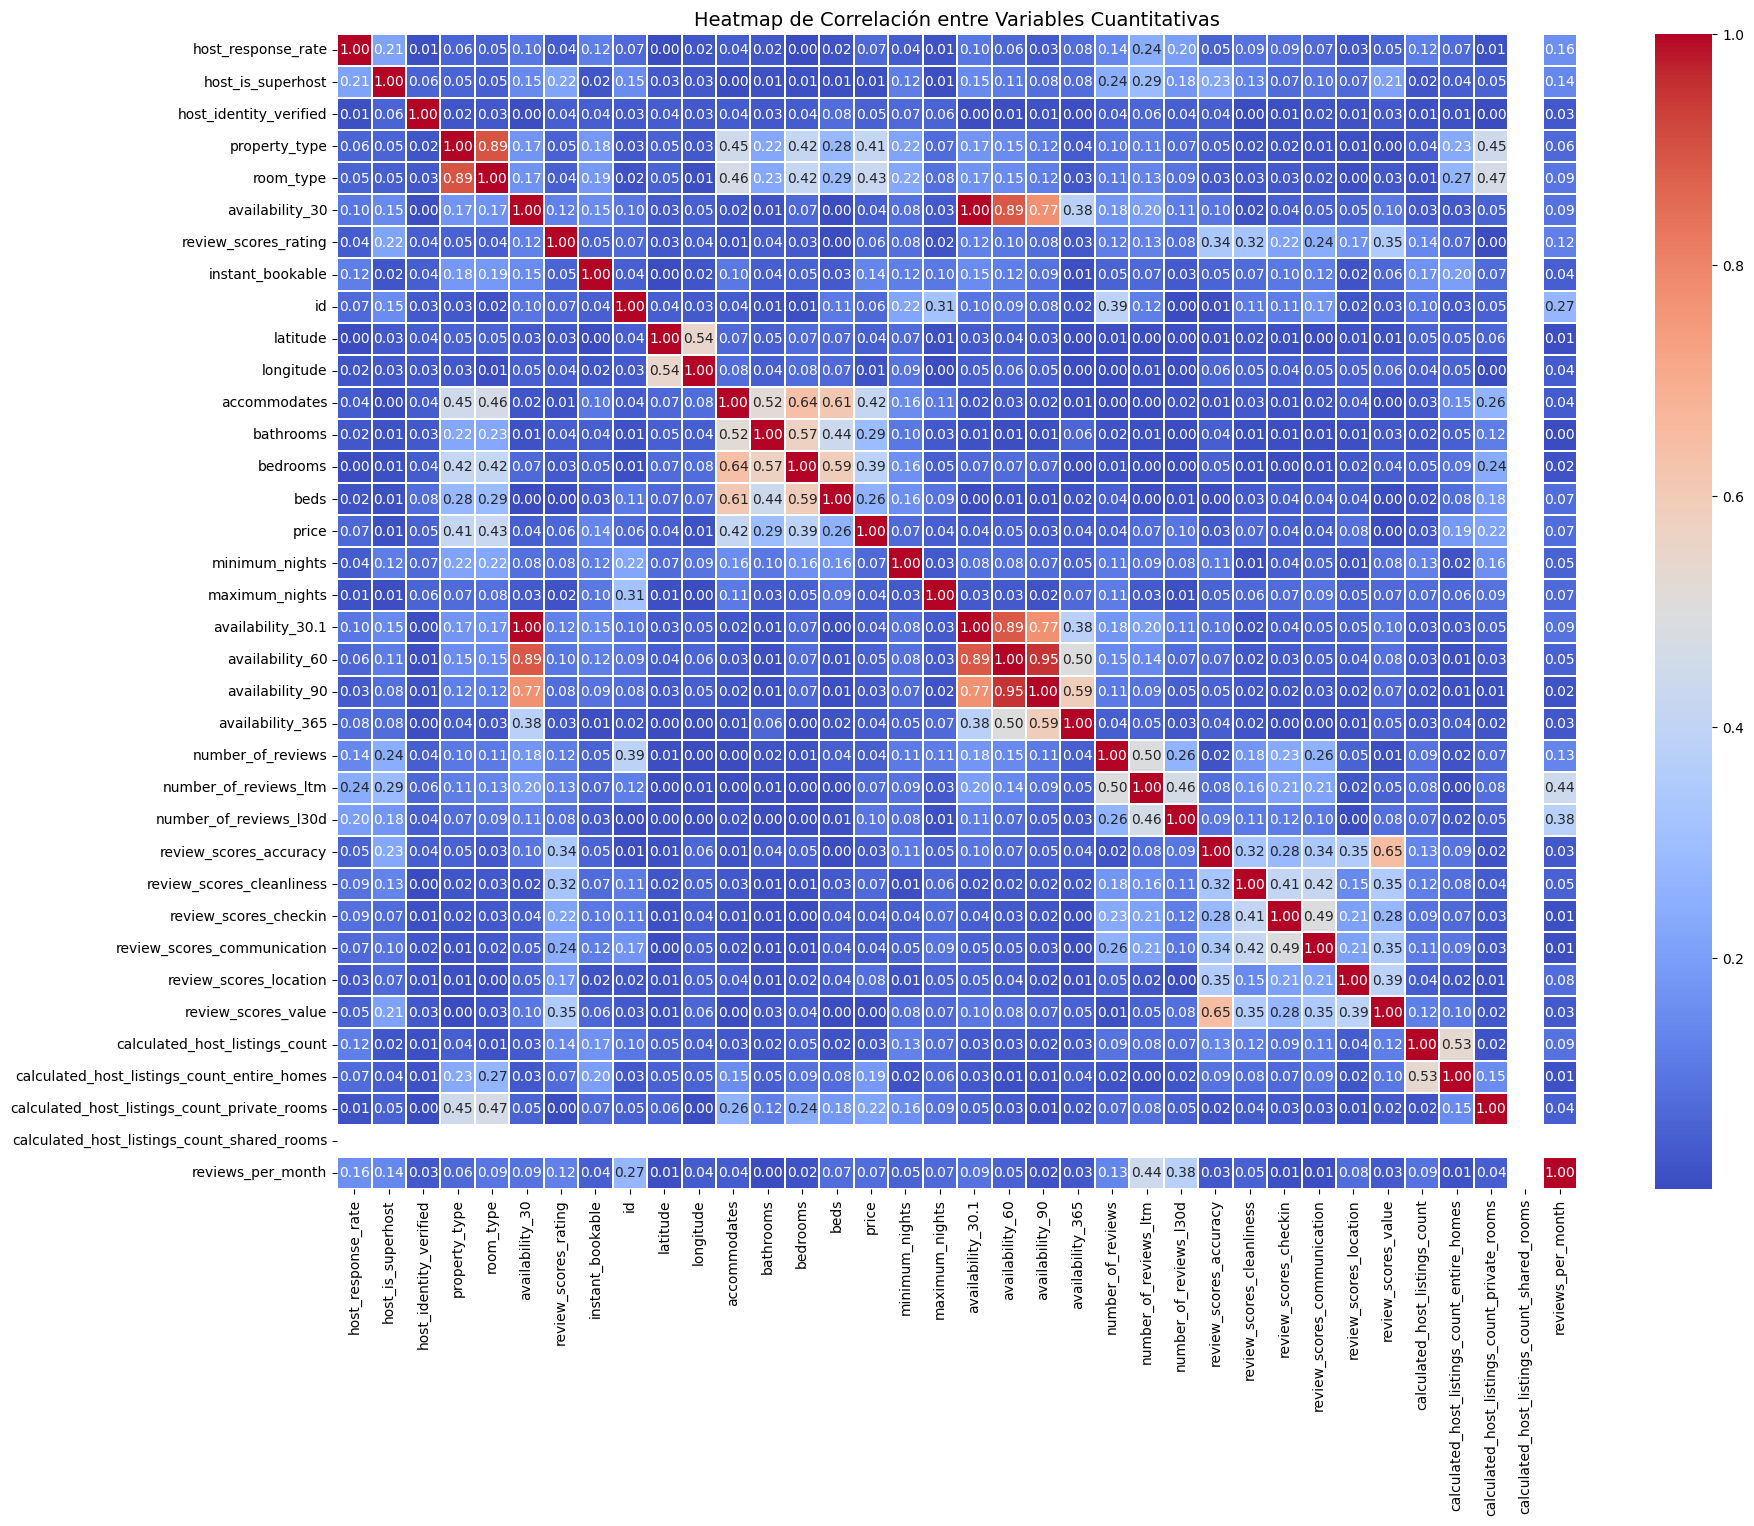

In [29]:
df_numeric = f1.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación
corr_matrix = df_numeric.corr()
corr_matrix2= abs(corr_matrix)

# Crear el heatmap
plt.figure(figsize=(20, 15))  # Ajusta el tamaño
sns.heatmap(corr_matrix2, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.10)

# Configurar el título
plt.title("Heatmap de Correlación entre Variables Cuantitativas", fontsize=14)

# Mostrar la gráfica
plt.show()

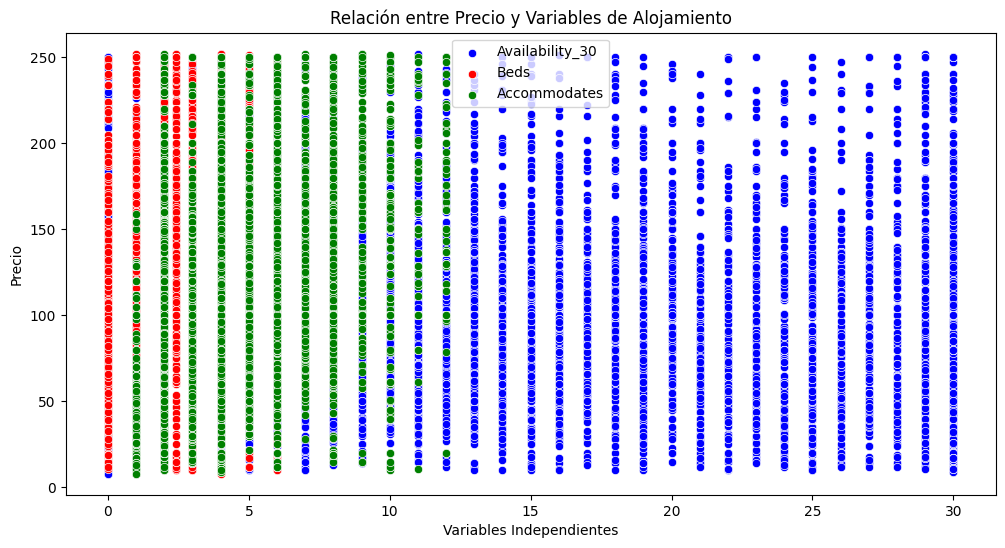

In [41]:
# Gráficos de dispersión
plt.figure(figsize=(12, 6))
sns.scatterplot(x='availability_30', y='price', color='blue', data=df)
sns.scatterplot(x='beds', y='price', color='red', data=df)
sns.scatterplot(x='accommodates', y='price', color='green', data=df)
plt.xlabel('Variables Independientes')
plt.ylabel('Precio')
plt.title('Relación entre Precio y Variables de Alojamiento')
plt.legend(['Availability_30', 'Beds', 'Accommodates'])
plt.show()

In [42]:
# Declaración de variables independientes
Vars_Indep = df[['review_scores_cleanliness', 'review_scores_checkin', 'reviews_per_month', 'review_scores_communication']]
Vars_Indep2 = df[['reviews_per_month', 'number_of_reviews_l30d', 'number_of_reviews_ltm', 'host_is_superhost']]
Vars_Indep3 = df[['review_scores_value', 'review_scores_accuracy', 'review_scores_rating', 'host_response_rate']]
Vars_Indep4 = df[['calculated_host_listings_count_entire_homes', 'availability_365', 'availability_90', 'availability_60']]
Vars_Indep5 = df[['review_scores_location', 'availability_30', 'calculated_host_listings_count', 'maximum_nights']]
Vars_Indep6 = df[['price', 'beds', 'bedrooms', 'number_of_reviews_ltm']]
Vars_Indep7 = df[['price', 'beds', 'accommodates', 'review_scores_rating']]
Vars_Indep8 = df[['beds', 'bedrooms', 'accommodates', 'calculated_host_listings_count_entire_homes']]
Vars_Indep9 = df[['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_communication']]
Vars_Indep10 = df[['number_of_reviews_ltm', 'number_of_reviews_l30d', 'number_of_reviews', 'host_response_rate']]

In [43]:
#Declaración de variables dependientes
Var_Dep= df['id']
Var_Dep2= df['host_response_rate']
Var_Dep3= df['host_is_superhost']
Var_Dep4= df['calculated_host_listings_count']
Var_Dep5= df['room_type']
Var_Dep6= df['accommodates']
Var_Dep7= df['bedrooms']
Var_Dep8= df['price']
Var_Dep9= df['review_scores_value']
Var_Dep10= df['reviews_per_month']

In [44]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model2= LinearRegression()
model3= LinearRegression()
model4= LinearRegression()
model5= LinearRegression()
model6= LinearRegression()
model7= LinearRegression()
model8= LinearRegression()
model9= LinearRegression()
model10= LinearRegression()

In [45]:
#Verificamos la función relacionada al modelo
type(model)
type(model2)
type(model3)
type(model4)
type(model5)
type(model6)
type(model7)
type(model8)
type(model9)
type(model10)

sklearn.linear_model._base.LinearRegression

In [46]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)
model2.fit(X=Vars_Indep2, y=Var_Dep2)
model3.fit(X=Vars_Indep3, y=Var_Dep3)
model4.fit(X=Vars_Indep4, y=Var_Dep4)
model5.fit(X=Vars_Indep5, y=Var_Dep5)
model6.fit(X=Vars_Indep6, y=Var_Dep6)
model7.fit(X=Vars_Indep7, y=Var_Dep7)
model8.fit(X=Vars_Indep8, y=Var_Dep8)
model9.fit(X=Vars_Indep9, y=Var_Dep9)
model10.fit(X=Vars_Indep10, y=Var_Dep10)

LinearRegression()

In [47]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__
model2.__dict__
model3.__dict__
model4.__dict__
model5.__dict__
model6.__dict__
model7.__dict__
model8.__dict__
model9.__dict__
model10.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews_ltm', 'number_of_reviews_l30d',
        'number_of_reviews', 'host_response_rate'], dtype=object),
 'n_features_in_': 4,
 'coef_': array([ 0.04352774,  0.2193386 , -0.00594905,  0.00071104]),
 'rank_': 4,
 'singular_': array([3669.4728918 , 1565.35095082,  561.70359934,   65.67405411]),
 'intercept_': np.float64(0.6860387110460752)}

In [48]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)
model2.score(Vars_Indep2,Var_Dep2)
model3.score(Vars_Indep3,Var_Dep3)
model4.score(Vars_Indep4,Var_Dep4)
model5.score(Vars_Indep5,Var_Dep5)
model6.score(Vars_Indep6,Var_Dep6)
model7.score(Vars_Indep7,Var_Dep7)
model8.score(Vars_Indep8,Var_Dep8)
model9.score(Vars_Indep9,Var_Dep9)
model10.score(Vars_Indep10,Var_Dep10)

0.24582144124405736

In [49]:

#Predecimos los valores de totales
y_pred= model.predict (X=df[['review_scores_cleanliness','review_scores_checkin','reviews_per_month','review_scores_communication']])
y_pred2= model2.predict (X=df[['reviews_per_month','number_of_reviews_l30d','number_of_reviews_ltm','host_is_superhost']])
y_pred3= model3.predict (X=df[['review_scores_value','review_scores_accuracy','review_scores_rating','host_response_rate']])
y_pred4= model4.predict (X=df[['calculated_host_listings_count_entire_homes','availability_365','availability_90','availability_60']])
y_pred5= model5.predict (X=df[['review_scores_location','availability_30','calculated_host_listings_count','maximum_nights']])
y_pred6= model6.predict (X=df[['price','beds','bedrooms','number_of_reviews_ltm']])
y_pred7= model7.predict (X=df[['price','beds','accommodates','review_scores_rating']])
y_pred8= model8.predict (X=df[['beds','bedrooms','accommodates','calculated_host_listings_count_entire_homes']])
y_pred9= model9.predict (X=df[['review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_communication']])
y_pred10= model10.predict (X=df[['number_of_reviews_ltm','number_of_reviews_l30d','number_of_reviews','host_response_rate']])

In [50]:
#Insertamos la columna de predicciones en el DataFrame
df_numeric.insert(0, 'Pred_id', y_pred)
df_numeric.insert(0, 'Pred_rate', y_pred2)
df_numeric.insert(0, 'Pred_superhost', y_pred3)
df_numeric.insert(0, 'Pred_calc_host', y_pred4)
df_numeric.insert(0, 'Pred_room', y_pred5)
df_numeric.insert(0, 'Pred_accmm', y_pred6)
df_numeric.insert(0, 'Pred_bedrm', y_pred7)
df_numeric.insert(0, 'Pred_price', y_pred8)
df_numeric.insert(0, 'Pred_rv_score', y_pred9)
df_numeric.insert(0, 'Pred_rv_month', y_pred10)

<Axes: xlabel='review_scores_communication', ylabel='id'>

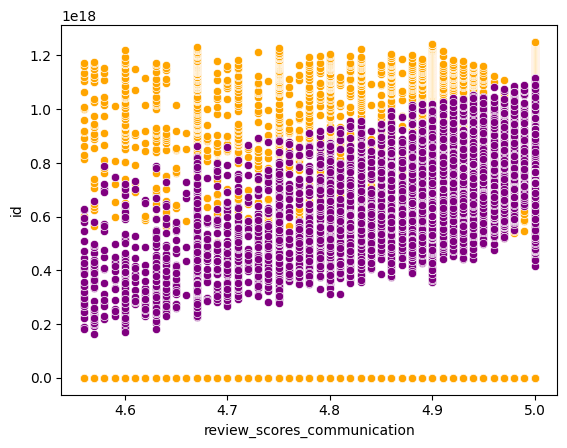

In [52]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='review_scores_communication', y='id', color="orange", data=df_numeric)
sns.scatterplot(x='review_scores_communication', y='Pred_id', color="purple", data=df_numeric)

<Axes: xlabel='host_is_superhost', ylabel='host_response_rate'>

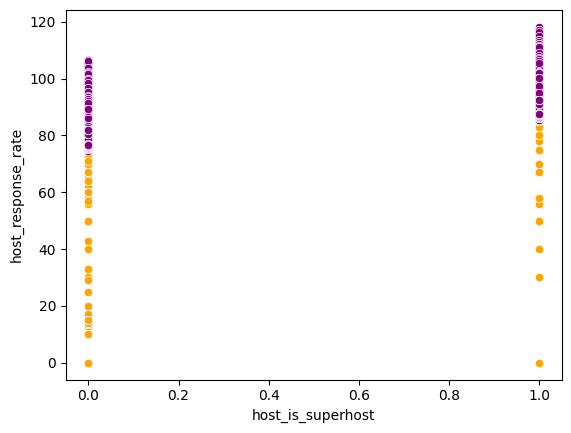

In [54]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='host_is_superhost', y='host_response_rate', color="orange", data=df_numeric)
sns.scatterplot(x='host_is_superhost', y='Pred_rate', color="purple", data=df_numeric)

<Axes: xlabel='review_scores_rating', ylabel='host_is_superhost'>

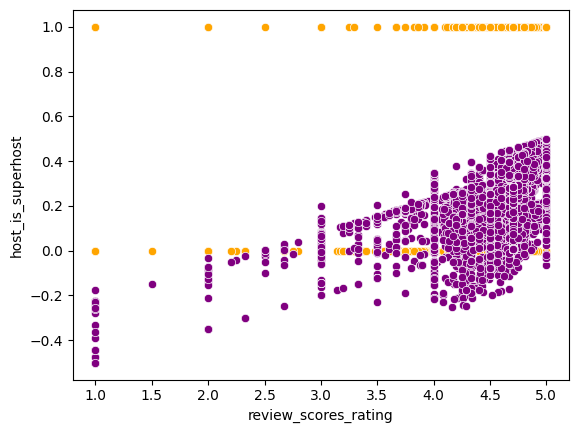

In [55]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='review_scores_rating', y='host_is_superhost', color="orange", data=df_numeric)
sns.scatterplot(x='review_scores_rating', y='Pred_superhost', color="purple", data=df_numeric)

<Axes: xlabel='calculated_host_listings_count_entire_homes', ylabel='calculated_host_listings_count'>

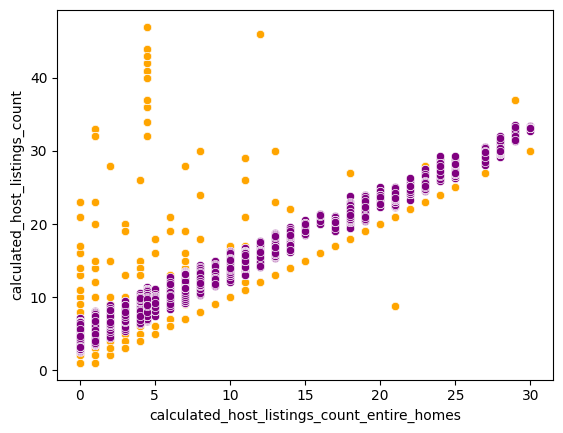

In [56]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='calculated_host_listings_count_entire_homes', y='calculated_host_listings_count', color="orange", data=df_numeric)
sns.scatterplot(x='calculated_host_listings_count_entire_homes', y='Pred_calc_host', color="purple", data=df_numeric)

<Axes: xlabel='review_scores_location', ylabel='room_type'>

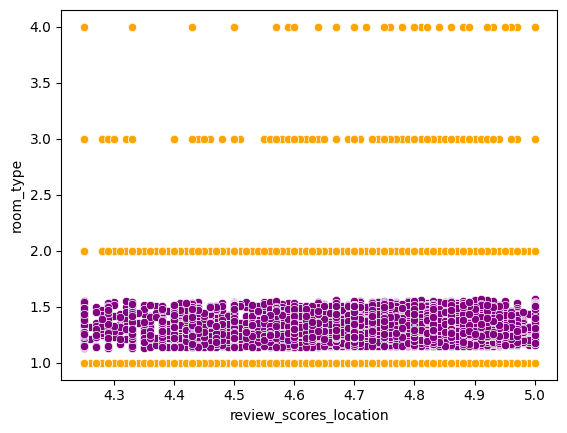

In [57]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='review_scores_location', y='room_type', color="orange", data=df_numeric)
sns.scatterplot(x='review_scores_location', y='Pred_room', color="purple", data=df_numeric)

<Axes: xlabel='beds', ylabel='accommodates'>

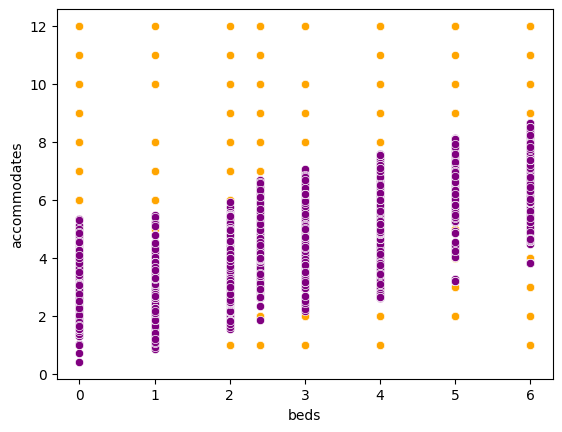

In [58]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='beds', y='accommodates', color="orange", data=df_numeric)
sns.scatterplot(x='beds', y='Pred_accmm', color="purple", data=df_numeric)

<Axes: xlabel='accommodates', ylabel='bedrooms'>

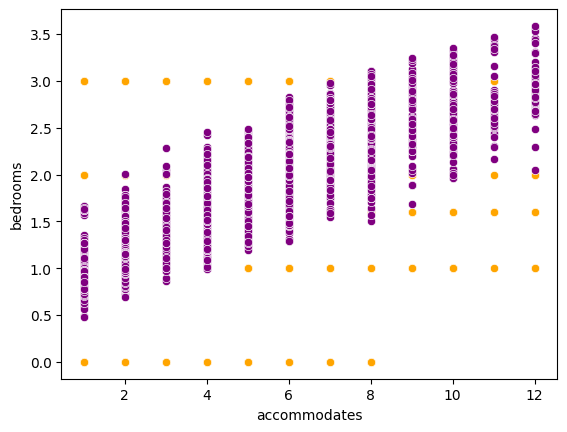

In [59]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='accommodates', y='bedrooms', color="orange", data=df_numeric)
sns.scatterplot(x='accommodates', y='Pred_bedrm', color="purple", data=df_numeric)

<Axes: xlabel='bedrooms', ylabel='price'>

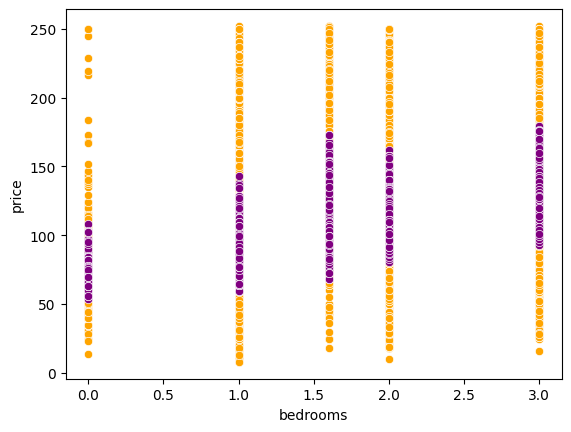

In [60]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='bedrooms', y='price', color="orange", data=df_numeric)
sns.scatterplot(x='bedrooms', y='Pred_price', color="purple", data=df_numeric)

<Axes: xlabel='review_scores_rating', ylabel='review_scores_value'>

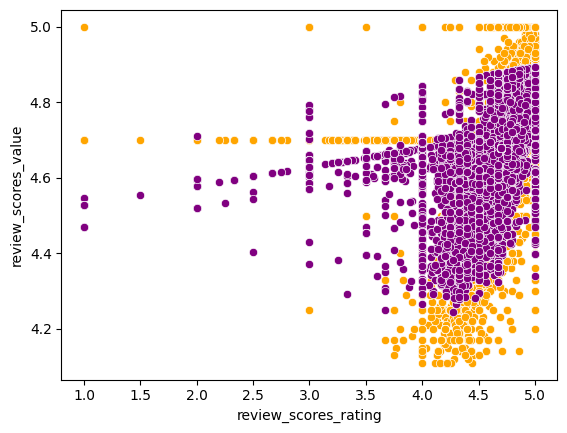

In [61]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='review_scores_rating', y='review_scores_value', color="orange", data=df_numeric)
sns.scatterplot(x='review_scores_rating', y='Pred_rv_score', color="purple", data=df_numeric)

<Axes: xlabel='number_of_reviews_ltm', ylabel='reviews_per_month'>

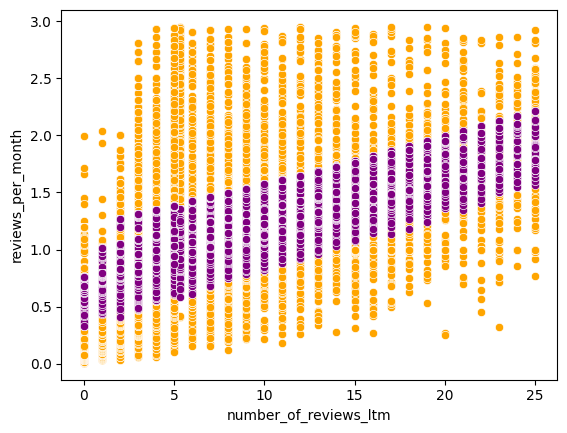

In [62]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='number_of_reviews_ltm', y='reviews_per_month', color="orange", data=df_numeric)
sns.scatterplot(x='number_of_reviews_ltm', y='Pred_rv_month', color="purple", data=df_numeric)

In [63]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter= model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter2= model2.score(X=Vars_Indep2, y=Var_Dep2)
coef_Deter3= model3.score(X=Vars_Indep3, y=Var_Dep3)
coef_Deter4= model4.score(X=Vars_Indep4, y=Var_Dep4)
coef_Deter5= model5.score(X=Vars_Indep5, y=Var_Dep5)
coef_Deter6= model6.score(X=Vars_Indep6, y=Var_Dep6)
coef_Deter7= model7.score(X=Vars_Indep7, y=Var_Dep7)
coef_Deter8= model8.score(X=Vars_Indep8, y=Var_Dep8)
coef_Deter9= model9.score(X=Vars_Indep9, y=Var_Dep9)
coef_Deter10= model10.score(X=Vars_Indep10, y=Var_Dep10)

In [64]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl2=np.sqrt(coef_Deter2)
coef_Correl3=np.sqrt(coef_Deter3)
coef_Correl4=np.sqrt(coef_Deter4)
coef_Correl5=np.sqrt(coef_Deter5)
coef_Correl6=np.sqrt(coef_Deter6)
coef_Correl7=np.sqrt(coef_Deter7)
coef_Correl8=np.sqrt(coef_Deter8)
coef_Correl9=np.sqrt(coef_Deter9)
coef_Correl10=np.sqrt(coef_Deter10)

In [65]:
#Encontramos todas las correlaciones entre las variables
Corr_Factors=df_numeric.corr()
Corr_Factors

Pred_rv_month  Pred_rv_score  \
Pred_rv_month                                      1.000000       0.058819   
Pred_rv_score                                      0.058819       1.000000   
Pred_price                                        -0.005538      -0.002952   
Pred_bedrm                                        -0.028161       0.024473   
Pred_accmm                                        -0.020798       0.031149   
Pred_room                                         -0.156758      -0.044269   
Pred_calc_host                                    -0.011899      -0.115640   
Pred_superhost                                     0.285044       0.716516   
Pred_rate                                          0.842520       0.159390   
Pred_id                                            0.319783       0.304493   
host_response_rate                                 0.316894       0.026048   
host_is_superhost                                  0.262364       0.250904   
host_identity_verified                             0.056685       0.035851   
property_type                                     -0.101845      -0.042744   
room_type                                         -0.121541      -0.022702   
availability_30                                   -0.172777      -0.088848   
review_scores_rating                               0.111276       0.515070   
instant_bookable                                   0.062567      -0.080089   
id                                                 0.007432       0.033157   
latitude                                           0.003791      -0.016328   
longitude                                          0.009828      -0.070829   
accommodates                                      -0.007935       0.007039   
bathrooms                                          0.005728       0.036303   
bedrooms                                          -0.005856       0.044399   
beds                                              -0.016200      -0.008996   
price                                             -0.093357       0.050586   
minimum_nights                                     0.079664       0.106101   
maximum_nights                                    -0.005781      -0.068355   
availability_30.1                                 -0.172777      -0.088848   
availability_60                                   -0.113409      -0.062965   
availability_90                                   -0.065708      -0.045052   
availability_365                                  -0.045510      -0.033917   
number_of_reviews                                  0.272253      -0.028008   
number_of_reviews_ltm                              0.893174       0.029773   
number_of_reviews_l30d                             0.758373       0.059592   
review_scores_accuracy                             0.101770       0.955109   
review_scores_cleanliness                         -0.138598       0.519917   
review_scores_checkin                             -0.165046       0.391962   
review_scores_communication                       -0.154452       0.507886   
review_scores_location                             0.000644       0.362991   
review_scores_value                                0.085141       0.680555   
calculated_host_listings_count                    -0.062786      -0.163689   
calculated_host_listings_count_entire_homes        0.000301      -0.111255   
calculated_host_listings_count_private_rooms      -0.065791      -0.003824   
calculated_host_listings_count_shared_rooms             NaN            NaN   
reviews_per_month                                  0.495804       0.004487   

                                              Pred_price  Pred_bedrm  \
Pred_rv_month                                  -0.005538   -0.028161   
Pred_rv_score                                  -0.002952    0.024473   
Pred_price                                      1.000000    0.840457   
Pred_bedrm                                      0.840457    1.000000   
Pred_accmm         

In [66]:
#Encontramos el valor de todas las correlaciones entre las variables
Corr_Factors1=abs(Corr_Factors)
Corr_Factors1

Pred_rv_month  Pred_rv_score  \
Pred_rv_month                                      1.000000       0.058819   
Pred_rv_score                                      0.058819       1.000000   
Pred_price                                         0.005538       0.002952   
Pred_bedrm                                         0.028161       0.024473   
Pred_accmm                                         0.020798       0.031149   
Pred_room                                          0.156758       0.044269   
Pred_calc_host                                     0.011899       0.115640   
Pred_superhost                                     0.285044       0.716516   
Pred_rate                                          0.842520       0.159390   
Pred_id                                            0.319783       0.304493   
host_response_rate                                 0.316894       0.026048   
host_is_superhost                                  0.262364       0.250904   
host_identity_verified                             0.056685       0.035851   
property_type                                      0.101845       0.042744   
room_type                                          0.121541       0.022702   
availability_30                                    0.172777       0.088848   
review_scores_rating                               0.111276       0.515070   
instant_bookable                                   0.062567       0.080089   
id                                                 0.007432       0.033157   
latitude                                           0.003791       0.016328   
longitude                                          0.009828       0.070829   
accommodates                                       0.007935       0.007039   
bathrooms                                          0.005728       0.036303   
bedrooms                                           0.005856       0.044399   
beds                                               0.016200       0.008996   
price                                              0.093357       0.050586   
minimum_nights                                     0.079664       0.106101   
maximum_nights                                     0.005781       0.068355   
availability_30.1                                  0.172777       0.088848   
availability_60                                    0.113409       0.062965   
availability_90                                    0.065708       0.045052   
availability_365                                   0.045510       0.033917   
number_of_reviews                                  0.272253       0.028008   
number_of_reviews_ltm                              0.893174       0.029773   
number_of_reviews_l30d                             0.758373       0.059592   
review_scores_accuracy                             0.101770       0.955109   
review_scores_cleanliness                          0.138598       0.519917   
review_scores_checkin                              0.165046       0.391962   
review_scores_communication                        0.154452       0.507886   
review_scores_location                             0.000644       0.362991   
review_scores_value                                0.085141       0.680555   
calculated_host_listings_count                     0.062786       0.163689   
calculated_host_listings_count_entire_homes        0.000301       0.111255   
calculated_host_listings_count_private_rooms       0.065791       0.003824   
calculated_host_listings_count_shared_rooms             NaN            NaN   
reviews_per_month                                  0.495804       0.004487   

                                              Pred_price  Pred_bedrm  \
Pred_rv_month                                   0.005538    0.028161   
Pred_rv_score                                   0.002952    0.024473   
Pred_price                                      1.000000    0.840457   
Pred_bedrm                                      0.840457    1.000000   
Pred_accmm         

<Axes: >

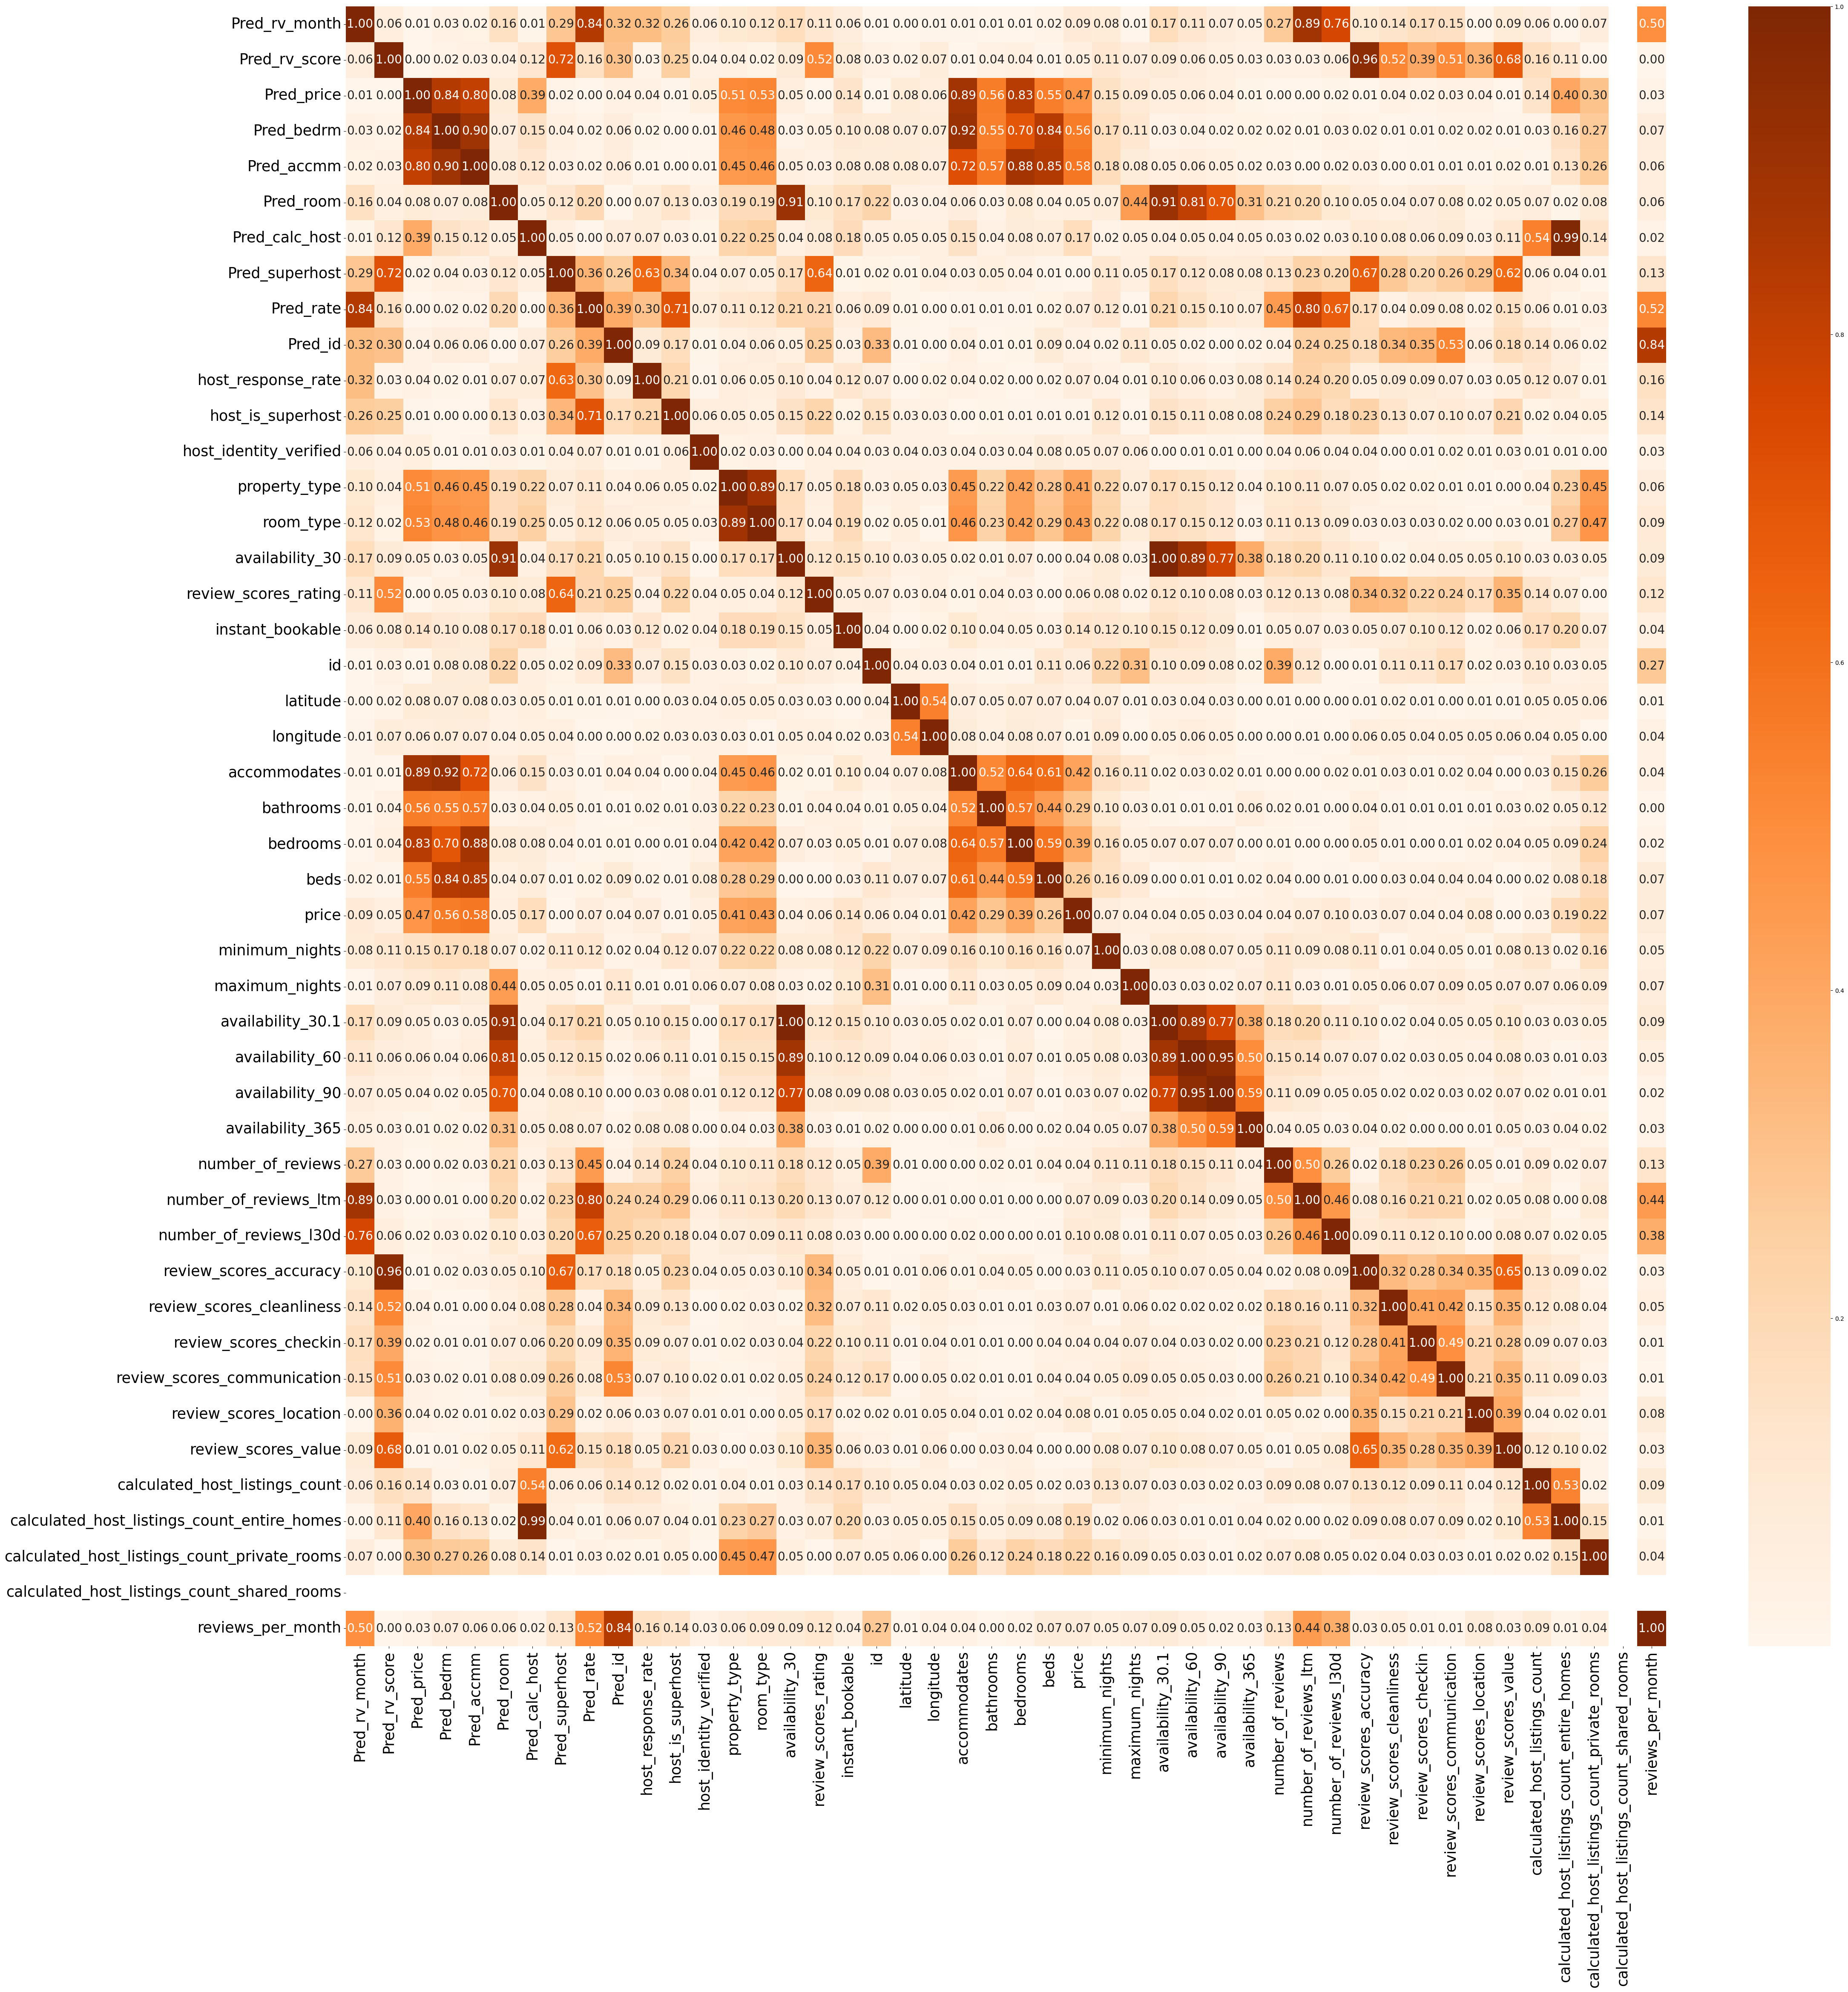

In [70]:
#Ajustamos el mapa de calor de las coeficientes de correlación 
plt.figure(figsize=(50,50))
plt.xticks(fontsize=25)  # Tamaño de etiquetas del eje X
plt.yticks(fontsize=25) 
Heat_Nap = sns.heatmap(Corr_Factors1, cmap= 'Oranges', annot=True, fmt=".2f", annot_kws={"size": 20})
Heat_Nap